# Model Development

## Load and Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")

In [3]:
cleaned_dataset = pd.read_csv("data/cleaned_dataset.csv")

In [4]:
# make a copy of the dataset
dataset = cleaned_dataset.copy()

## Model development for Customer Clustering (Clustering Model)

In [5]:
# Parse the 'date' column and extract features
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset['day_of_week'] = dataset['date'].dt.dayofweek         # 0 = Monday, 6 = Sunday
dataset['month'] = dataset['date'].dt.month
dataset['is_weekend'] = dataset['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, else 0

In [6]:
dataset.head()

,cus.id,date,cus._location,age,gender,sell_price,does_he_she_come_from_facebook_page,does_he_she_followed_our_page,did_he_she_buy_any_mobile_before,did_he_she_hear_of_our_shop_before,...,mobile_name_redmi_note_12_pro_8_128,mobile_name_vivo_t3x_5g_8_128,mobile_name_vivo_y200_5g_6_128,mobile_name_iphone_16_pro_256gb,mobile_name_iphone_16_pro_max_1tb,mobile_name_iqoo_neo_9_pro_5g_12_256,mobile_name_iqoo_z7_5g_6_128,day_of_week,month,is_weekend
0,1,2024-05-27,Rangamati Sadar,49,0,17073.0,0,1,0,1,...,False,False,False,False,False,False,False,0,5,0
1,2,2024-05-27,Inside Rangamati,44,1,15546.0,1,0,0,1,...,True,False,False,False,False,False,False,0,5,0
2,3,2024-05-27,Rangamati Sadar,45,1,26516.0,1,0,0,1,...,False,False,False,False,False,False,False,0,5,0
3,4,2024-05-27,Rangamati Sadar,46,1,21927.0,0,0,0,1,...,False,False,False,False,False,False,False,0,5,0
4,5,2024-05-27,Outside Rangamati,27,0,16718.0,1,0,0,1,...,False,True,False,False,False,False,False,0,5,0


In [7]:
# Define features (drop non-useful columns and target)
dataset_clustering = dataset.drop(columns=[
    'cus.id', 'date', 'cus._location'
])

In [8]:
dataset_clustering.head()

,age,gender,sell_price,does_he_she_come_from_facebook_page,does_he_she_followed_our_page,did_he_she_buy_any_mobile_before,did_he_she_hear_of_our_shop_before,is_local,mobile_name_galaxy_m35_5g_8_128,mobile_name_galaxy_s24_ultra_12_256,...,mobile_name_redmi_note_12_pro_8_128,mobile_name_vivo_t3x_5g_8_128,mobile_name_vivo_y200_5g_6_128,mobile_name_iphone_16_pro_256gb,mobile_name_iphone_16_pro_max_1tb,mobile_name_iqoo_neo_9_pro_5g_12_256,mobile_name_iqoo_z7_5g_6_128,day_of_week,month,is_weekend
0,49,0,17073.0,0,1,0,1,0,False,False,...,False,False,False,False,False,False,False,0,5,0
1,44,1,15546.0,1,0,0,1,0,False,False,...,True,False,False,False,False,False,False,0,5,0
2,45,1,26516.0,1,0,0,1,0,False,False,...,False,False,False,False,False,False,False,0,5,0
3,46,1,21927.0,0,0,0,1,0,False,False,...,False,False,False,False,False,False,False,0,5,0
4,27,0,16718.0,1,0,0,1,1,False,False,...,False,True,False,False,False,False,False,0,5,0


In [9]:
dataset_clustering.dtypes.reset_index().rename(columns={'index': 'Feature', 0: 'DataType'})

,Feature,DataType
0,age,int64
1,gender,int64
2,sell_price,float64
3,does_he_she_come_from_facebook_page,int64
4,does_he_she_followed_our_page,int64
5,did_he_she_buy_any_mobile_before,int64
6,did_he_she_hear_of_our_shop_before,int64
7,is_local,int64
8,mobile_name_galaxy_m35_5g_8_128,bool
9,mobile_name_galaxy_s24_ultra_12_256,bool


### Standardize numeric features

In [10]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_clustering)

In [11]:
# Save scaler
joblib.dump(scaler, "models/kmeans_scaler.pkl")
print("Scaler saved to models/kmeans_scaler.pkl")

Scaler saved to models/kmeans_scaler.pkl


### Elbow method to find optimal K

In [12]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertia.append(kmeans.inertia_)


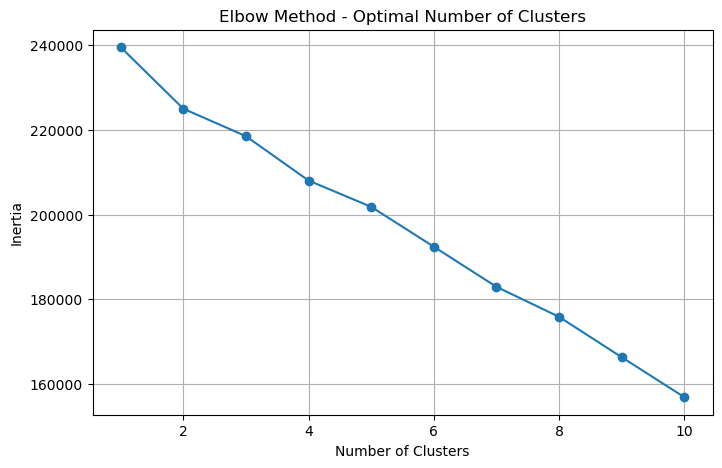

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Fit KMeans with chosen K

In [14]:
optimal_k = 3 # update this based on elbow result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit on scaled data and get cluster labels
cluster_labels = kmeans.fit_predict(dataset_scaled)

# Assign labels to original dataset
dataset_clustering['cluster'] = cluster_labels

In [15]:
# save model
joblib.dump(kmeans, "models/kmeans.pkl")
print("✅ Clustering model saved to models/kmeans.pkl")

✅ Clustering model saved to models/kmeans.pkl


### Visualize with PCA

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_scaled)
dataset_clustering['pca1'] = pca_result[:, 0]
dataset_clustering['pca2'] = pca_result[:, 1]

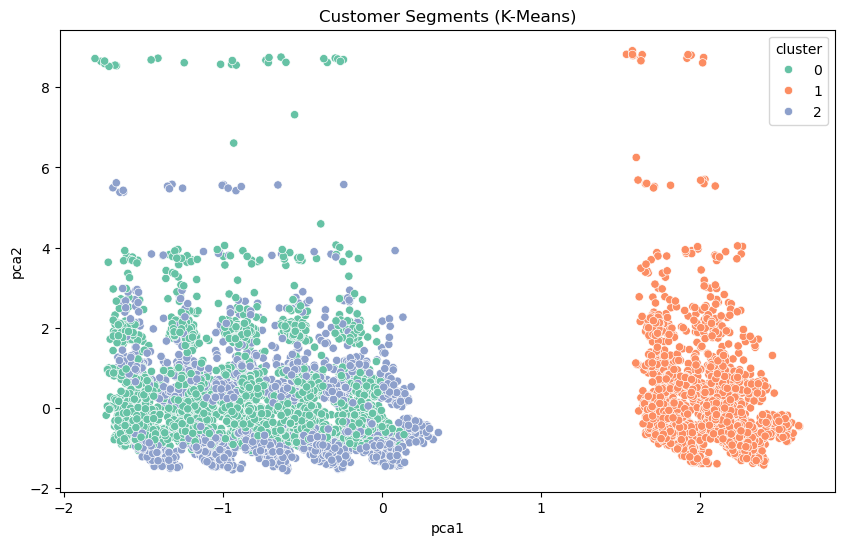

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_clustering, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Customer Segments (K-Means)')
plt.show()

### Cluster profiling

In [18]:
cluster_profile = dataset_clustering.groupby('cluster').mean(numeric_only=True)
print("Cluster profiles:")
cluster_profile

Cluster profiles:


,age,gender,sell_price,does_he_she_come_from_facebook_page,does_he_she_followed_our_page,did_he_she_buy_any_mobile_before,did_he_she_hear_of_our_shop_before,is_local,mobile_name_galaxy_m35_5g_8_128,mobile_name_galaxy_s24_ultra_12_256,...,mobile_name_vivo_y200_5g_6_128,mobile_name_iphone_16_pro_256gb,mobile_name_iphone_16_pro_max_1tb,mobile_name_iqoo_neo_9_pro_5g_12_256,mobile_name_iqoo_z7_5g_6_128,day_of_week,month,is_weekend,pca1,pca2
cluster,,,,,,,,,,,,,,,,,,,,,
0,34.140415,0.505653,26096.732317,0.339469,0.392848,0.240600,0.620300,0.338417,0.103602,0.104917,...,0.000000,0.000000,0.093084,0.094925,0.000000,2.001315,6.924270,0.0,-0.843705,0.149932
1,33.916567,0.495010,25412.350499,0.360080,0.399202,0.251896,0.581238,0.340918,0.053493,0.056687,...,0.059481,0.059880,0.053493,0.056287,0.060679,5.491816,7.068663,1.0,2.020748,0.080382
2,34.035895,0.489661,23206.338666,0.349980,0.414748,0.252829,0.596567,0.335154,0.000000,0.000000,...,0.144752,0.144752,0.000000,0.000000,0.144362,1.961373,7.083886,0.0,-0.723122,-0.301033


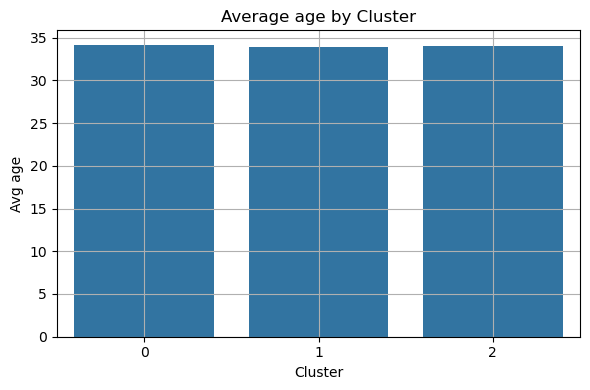

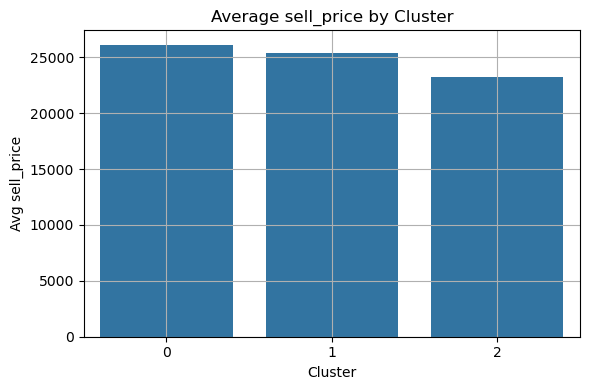

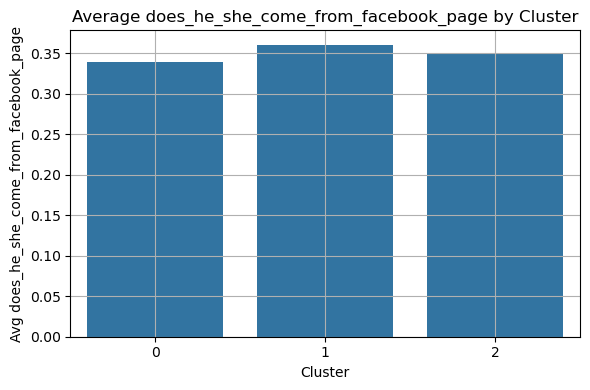

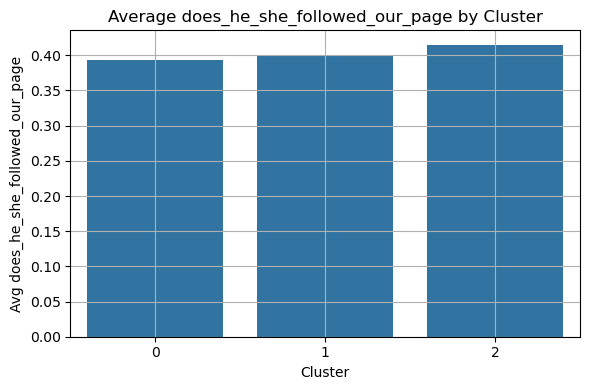

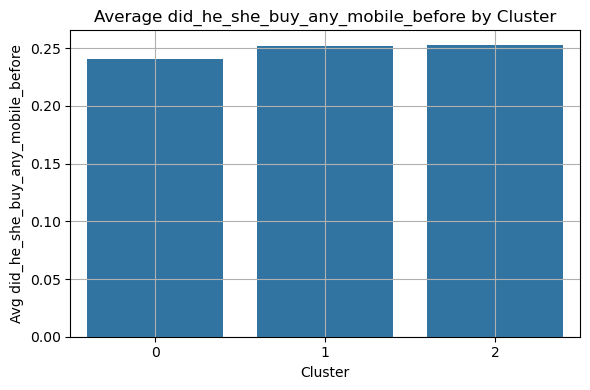

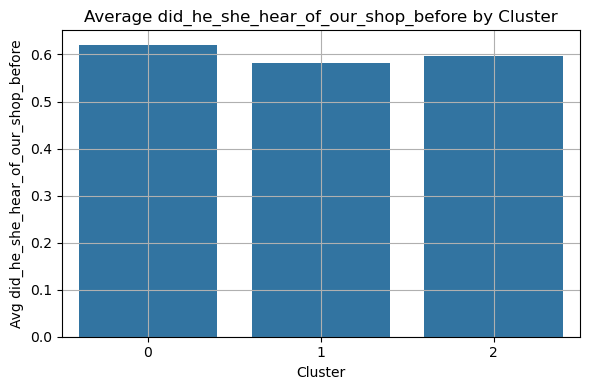

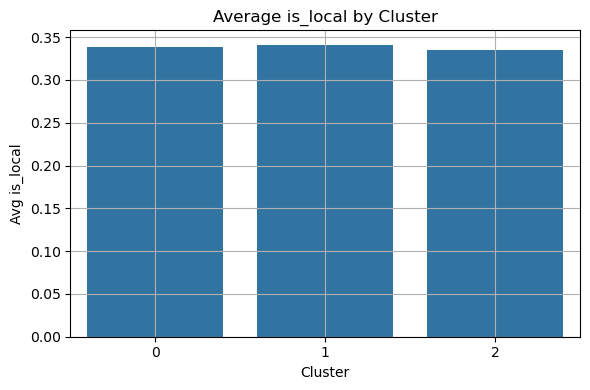

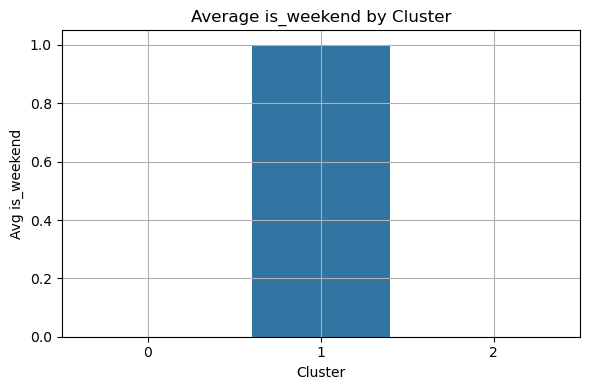

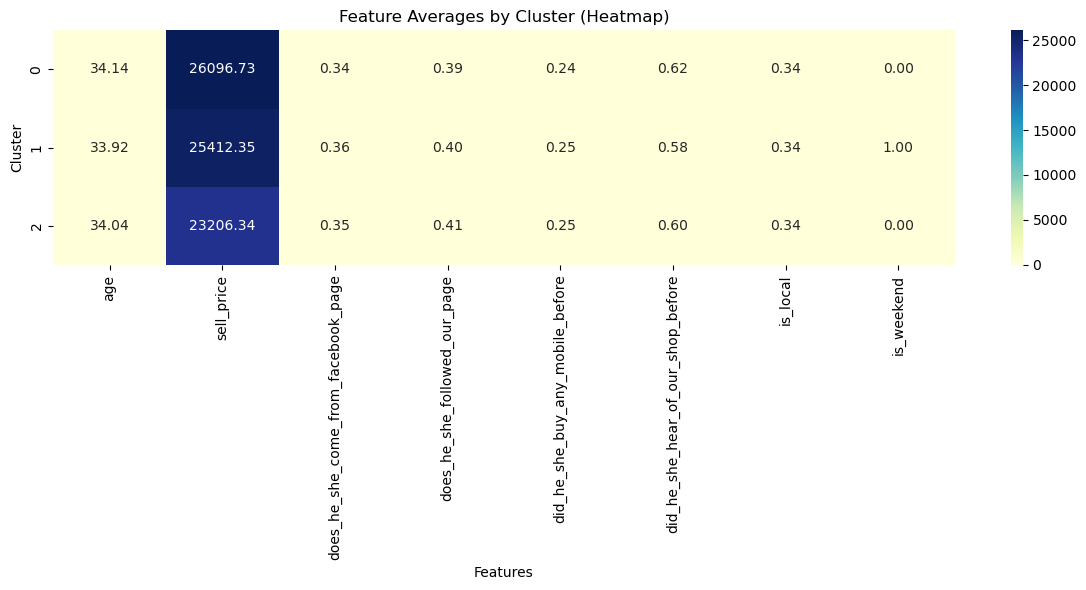

In [19]:
# Focus on key features for plotting
features_to_plot = [
    'age', 'sell_price', 'does_he_she_come_from_facebook_page',
    'does_he_she_followed_our_page', 'did_he_she_buy_any_mobile_before',
    'did_he_she_hear_of_our_shop_before', 'is_local', 'is_weekend'
]

# Average values of these features by cluster
cluster_summary = dataset_clustering.groupby('cluster')[features_to_plot].mean()

# Bar plot for each feature
import matplotlib.pyplot as plt

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature])
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Avg {feature}')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Heatmap of all feature averages per cluster
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Feature Averages by Cluster (Heatmap)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


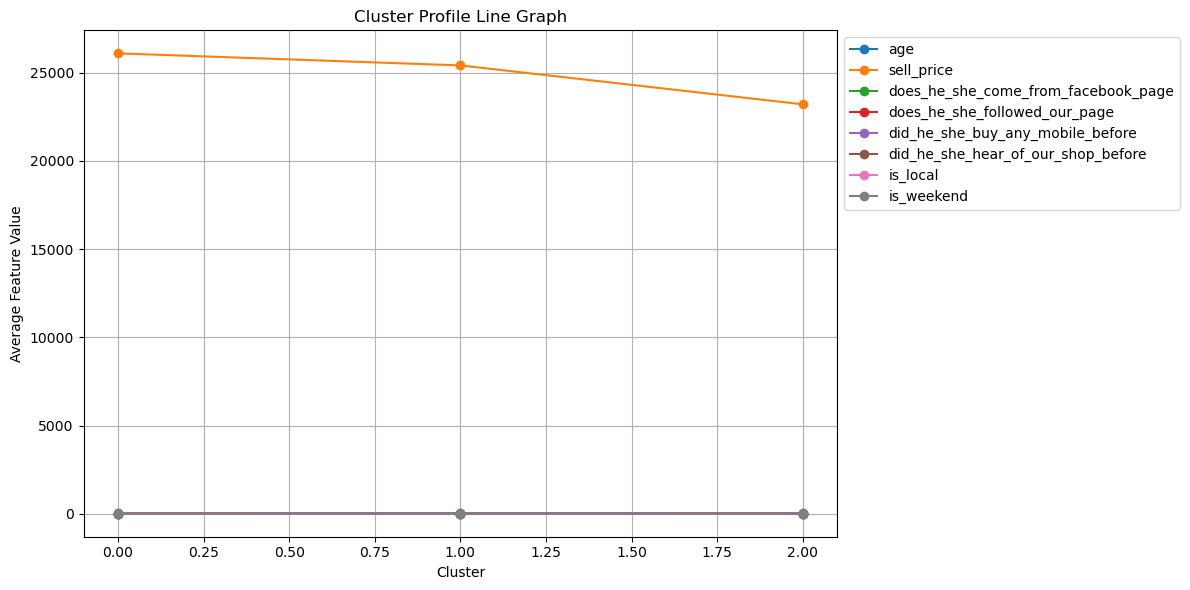

In [20]:
plt.figure(figsize=(12, 6))
for feature in cluster_summary.columns:
    plt.plot(cluster_summary.index, cluster_summary[feature], marker='o', label=feature)
plt.title('Cluster Profile Line Graph')
plt.xlabel('Cluster')
plt.ylabel('Average Feature Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


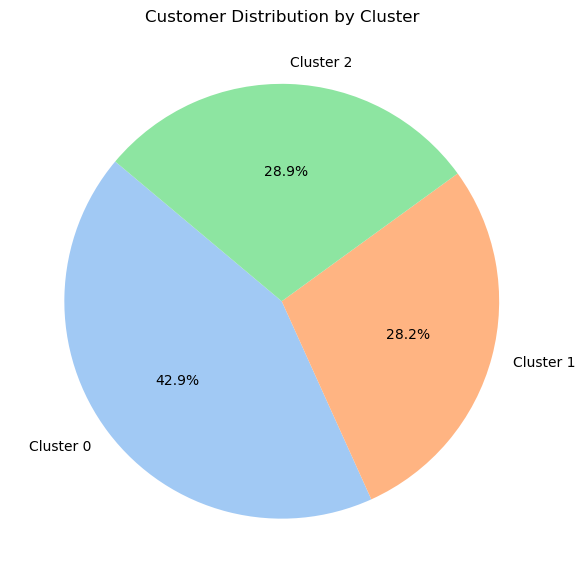

In [21]:
# Assuming `df` has a column `cluster` after clustering
cluster_counts = dataset_clustering['cluster'].value_counts().sort_index()
labels = [f'Cluster {i}' for i in cluster_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Cluster')
plt.tight_layout()
plt.show()
